<a href="https://colab.research.google.com/github/jtunde/Python/blob/main/cn3-17.01.2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Setare index

In [190]:
df = pd.read_csv('drive/MyDrive/data.csv')
df['TIME'] = pd.to_datetime(df['TIME'])
df_idx = df.set_index(['TIME'], drop=True)
df_idx.head(5)

,RON
TIME,
2021-01-01,4.9493
2021-01-02,4.9493
2021-01-03,4.9493
2021-01-04,4.8713
2021-01-05,4.8721


#### Flip the dataframe

In [191]:
df_idx = df_idx.sort_index(axis=1, ascending=True)
df_idx = df_idx.iloc[::-1]

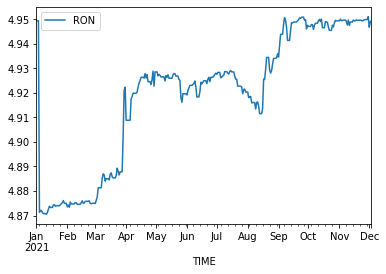

In [192]:
data = df_idx[['RON']]
data.plot(y='RON')

Separarea datelor

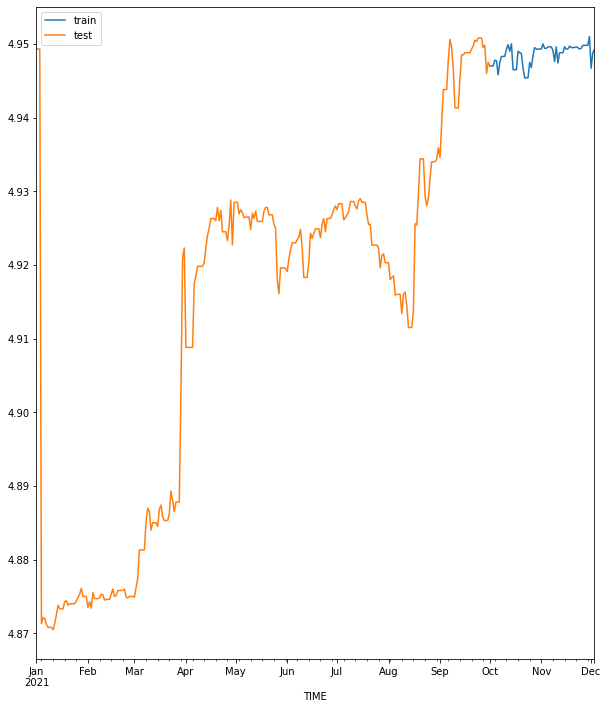

In [193]:
split_date = pd.Timestamp('10-01-2021')

train = data.loc[:split_date]
test = data.loc[split_date:]

ax = train.plot(figsize=(10,12))
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.show()

Normalizarea datelor

In [194]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.fit_transform(test)

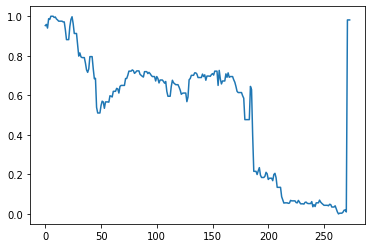

In [195]:
plt.plot(test_sc)

In [196]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

In [197]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (63 x 1)
Test size: (273 x 1)


In [198]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

In [199]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [201]:
from sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

r2_test = r2_score(y_test, y_pred)
print("R-squared is: %f"%r2_test)

R-squared is: 0.713601


Construire retea

In [202]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import keras.backend as K

1 strat ascuns cu 1 neuron

In [213]:
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=100, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0430
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0424
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0418
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0413
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0409
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0404
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0400
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0396
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0394
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0391
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0388
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0386
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

R-Squared: 0.880643


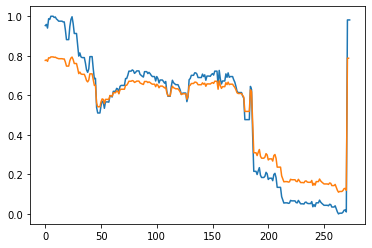

In [214]:
y_pred = model.predict(X_test)
plt.plot(test_sc)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))